Primeiramente importaremos a biblioteca que iremos usar nesse projeto:

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import unicodedata

Agora vamos importar o nosso dataframe, que nesse caso sera o "MICRODADOS_ENEM_2023.csv"

In [63]:
#Pegando o DataFrame puro do arquivo CSV
raw_df = pd.read_csv("MICRODADOS_ENEM_2023.csv", encoding='latin1', sep=';')

Antes de começarmos a realizar as nossas analizes estatisticas, devemos padronizar o nosso dataframe, removendo caracteres especiais como "ç", "à", "õ" e etc. Para que não ocorram conflitos durante o codigo

In [64]:
def standardize(dataframe: pd.DataFrame) -> pd.DataFrame:
    """
    Autor: Arthur Veras

    Descrição:
        Padroniza os nomes das colunas do DataFrame:
        - Converte para minúsculas
        - Substitui espaços por underscores (_)
        - Remove acentos e caracteres especiais

    Parâmetros:
        dataframe (pd.DataFrame): DataFrame cujas colunas serão padronizadas.

    Retorno:
        pd.DataFrame: DataFrame com os nomes das colunas padronizados.
    """
    def remove_accents(text: str) -> str:
        """
       Descrição:
          - Remove todos os acentos (diacríticos) de uma determinada string, convertendo caracteres
            como 'á', 'ç' ou 'ê' em seus equivalentes átonos 'a', 'c' e 'e'.

       Parâmetros:
            text (str): A string de entrada contendo caracteres acentuados.

    Retorna:
         str: Uma nova string com todos os acentos removidos, preservando apenas os caracteres base.
        """
        normalized_text = unicodedata.normalize('NFKD', text)
        return ''.join([c for c in normalized_text if not unicodedata.combining(c)])

    new_columns = [
        remove_accents(columns).lower().replace(" ", "_")
        for columns in dataframe.columns
    ]
    dataframe.columns = new_columns

    return dataframe

Agora vamos atribuir o nosso novo dataframe padronizado à variavel "standardized_dataframe"

In [65]:
standardized_dataframe = standardize(raw_df)

Agora sim podemos começar a fazer as nossas analises, vamos começar com algo simples, e fazer um grafico mostrando as cidades que tiveram a maior quantidade de provas aplicadas, e para isso utilizaremos esse codigo:

In [66]:
def aplicacao_prova(dataframe: pd.DataFrame) -> plt:
    """
            Autor: Arthur Mourao
            Descrição: Esse codigo vai pegar contar a quantidade de vezes que cada cidade aparece na coluna "no_municipio_prova"
            e vai mostrar as 10 cidades que tiveram a maior aplicação de provas (usando o ".head(10)")
            
            Parâmetros:
            dataframe (Nesse caso o standardized_dataframe): DataFrame cujo tera as cidades na coluna "no_municipio_prova" contadas.

            Retorno:
            pd.DataFrame: DataFrame com os nomes das colunas padronizados.
    """
    dataframe["no_municipio_prova"].value_counts().head(10).plot(kind='bar', color='dodgerblue')
    plt.title('Numero de provas aplicadas por cidade')
    plt.xlabel('Cidade')
    plt.ylabel('Quantidade')
    plt.xticks(rotation=60)
    plt.grid(axis='y')
    plt.tight_layout()
    return plt.show()

Vamos chamar a função da criação do grafico e vamos ver como ele ficou:

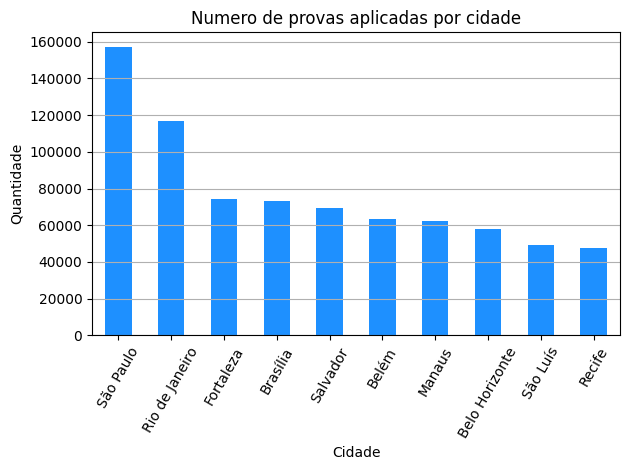

In [67]:
aplicacao_prova(standardized_dataframe)

Vamos fazer algo mais interessante, vamos calcular a media das notas de estudantes de escolas publicas e de estudantes de escolas publicas, em seguida iremos comparar suas diferenças em um grafico

In [68]:
def diferenca_notas_escolas(dataframe: pd.DataFrame) -> plt:
    """
            Autor: Arthur Mourao
            Descrição: Esse codigo vai calcular a media aritimetica das notas de estudantes de escolas publicas e vai compará-las
            com a media das notas de estudantes de escolas particulares. Depois, ele irá criar um grafico mostrando a diferença
            entre essas medias
            
            Parâmetros:
            dataframe (Nesse caso o standardized_dataframe): DataFrame cujo tera a "TP_ESCOLA" analisada:
            no questionario do enem, o TP_ESCOLA pode ser respondido com 3 Numeros diferentes
            # "1": Nao respondeu
            # "2": Escola Publica
            # "3": Escola particular

            Retorno:
            "plt", graficos com as notas de cada area(Ciências Humanas, Matematica, Ciências da Natureza e etc...)
    """
    #-------------------Medias das escolas publicas-------------------------------
    media_publica_cn = dataframe[dataframe['tp_escola'] == 2]['nu_nota_cn'].mean()
    media_publica_ch = dataframe[dataframe['tp_escola'] == 2]['nu_nota_ch'].mean()
    media_publica_lc = dataframe[dataframe['tp_escola'] == 2]['nu_nota_lc'].mean()
    media_publica_mt = dataframe[dataframe['tp_escola'] == 2]['nu_nota_mt'].mean()
    media_publica_red = dataframe[dataframe['tp_escola'] == 2]['nu_nota_redacao'].mean()
    #-------------------Medias das escolas particulares-------------------------------
    media_particular_cn = dataframe[dataframe['tp_escola'] == 3]['nu_nota_cn'].mean()
    media_particular_ch = dataframe[dataframe['tp_escola'] == 3]['nu_nota_ch'].mean()
    media_particular_lc = dataframe[dataframe['tp_escola'] == 3]['nu_nota_lc'].mean()
    media_particular_mt = dataframe[dataframe['tp_escola'] == 3]['nu_nota_mt'].mean()
    media_particular_red = dataframe[dataframe['tp_escola'] == 3]['nu_nota_redacao'].mean()
    def diferenca_CN():
        """
        Autor: Arthur Mourao
            Função Responsavel pela criação do grafico da area de Ciências da Natureza
        """
        titulos = ['Escola Pública', 'Escola Particular']
        medias = [media_publica_cn, media_particular_cn]
        plt.figure(figsize=(4, 6))
        plt.bar(titulos, medias, color=['green', 'limegreen'])
        plt.title('Média da Nota de Ciências da Natureza por Tipo de Escola')
        plt.ylabel('Nota Média')
        plt.grid(axis='y')
        return plt.show()
    def diferenca_CH():
        """
        Autor: Arthur Mourao
            Função Responsavel pela criação do grafico da area de Ciências Humanas
        """
        titulos = ['Escola Pública', 'Escola Particular']
        medias = [media_publica_ch, media_particular_ch]
        plt.figure(figsize=(4, 6))
        plt.bar(titulos, medias, color=['green', 'limegreen'])
        plt.title('Média da Nota de Ciências Humanas por Tipo de Escola')
        plt.ylabel('Nota Média')
        plt.grid(axis='y')
        return plt.show()
    def diferenca_LC():
        """
        Autor: Arthur Mourao
            Função Responsavel pela criação do grafico da area de Linguagens e Codigos
        """
        titulos = ['Escola Pública', 'Escola Particular']
        medias = [media_publica_lc, media_particular_lc]
        plt.figure(figsize=(4, 6))
        plt.bar(titulos, medias, color=['green', 'limegreen'])
        plt.title('Média da Nota de Linguagens e Codigos por Tipo de Escola')
        plt.ylabel('Nota Média')
        plt.grid(axis='y')
        return plt.show()
    def diferenca_MT():
        """
        Autor: Arthur Mourao
            Função Responsavel pela criação do grafico da area de Matematica
        """
        titulos = ['Escola Pública', 'Escola Particular']
        medias = [media_publica_mt, media_particular_mt]
        plt.figure(figsize=(4, 6))
        plt.bar(titulos, medias, color=['green', 'limegreen'])
        plt.title('Média da Nota de Linguagens e Codigos por Tipo de Escola')
        plt.ylabel('Nota Média')
        plt.grid(axis='y')
        return plt.show()
    def diferenca_RED():
        """
        Autor: Arthur Mourao
            Função Responsavel pela criação do grafico da area de Redação
        """
        titulos = ['Escola Pública', 'Escola Particular']
        medias = [media_publica_red, media_particular_red]
        plt.figure(figsize=(4, 6))
        plt.bar(titulos, medias, color=['green', 'limegreen'])
        plt.title('Média da Nota de Redação por Tipo de Escola')
        plt.ylabel('Nota Média')
        plt.grid(axis='y')
        return plt.show()
    def tabela_completa():
        """
        Autor: Arthur Mourao
            Função Responsavel pela criação do grafico completo
        """
        titulos = ["Linguagens e Codigos","Ciências da Humanas","Ciências da Natureza","Matematica","Redação"]
        x = np.arange(len(titulos))
        medias_publicas = [media_publica_lc,media_publica_ch,media_publica_cn,media_publica_mt,media_publica_red]
        medias_particulares = [media_particular_lc,media_particular_ch,media_particular_cn,media_particular_mt,media_particular_red]
        plt.figure(figsize=(10, 6))
        plt.xticks(x, titulos, rotation=15)
        largura = 0.3
        plt.bar(x - largura/2, medias_publicas, width=largura, color='green', label='Pública')
        plt.bar(x + largura/2, medias_particulares, width=largura, color='limegreen', label='Particular')
        plt.ylabel('Nota Média')
        plt.title('Comparação de Notas Médias por Tipo de Escola')
        plt.grid(axis='y')
        return plt.show()
    return(diferenca_LC(), diferenca_CH(), diferenca_CN(), diferenca_MT(), diferenca_RED(), tabela_completa())

Agora vamos ver como ficou as tabelas que construimos:

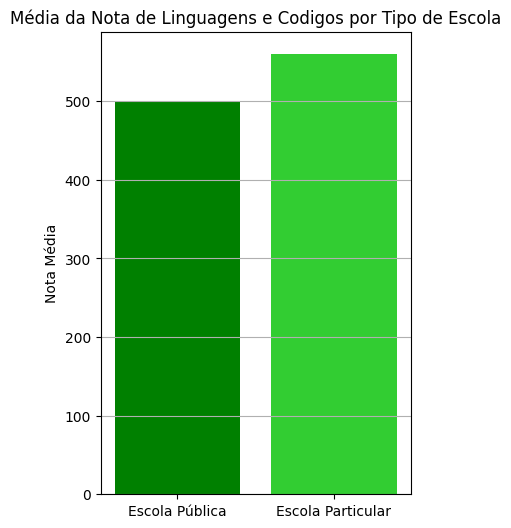

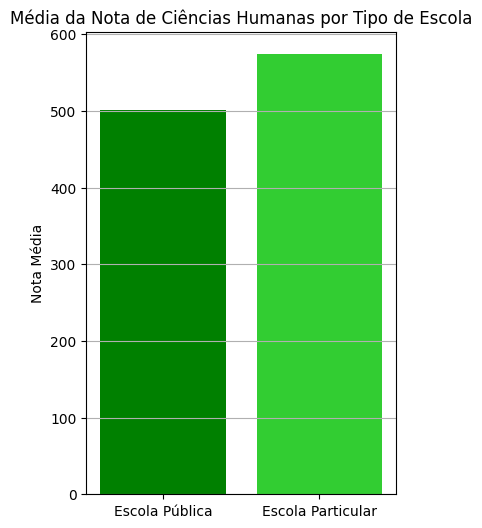

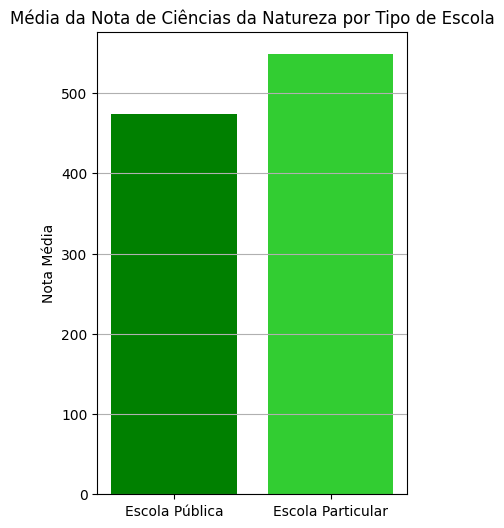

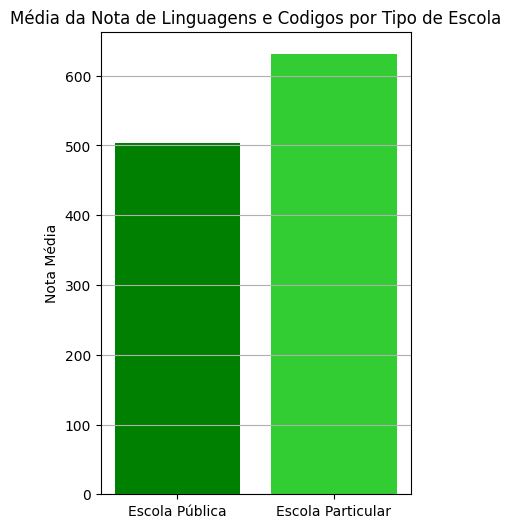

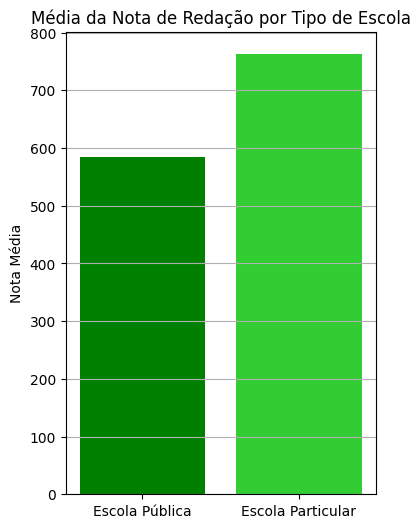

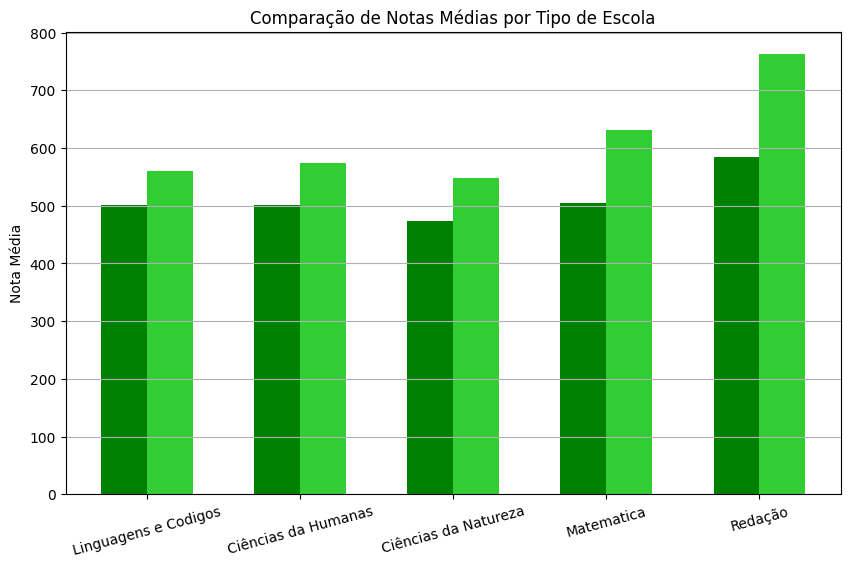

(None, None, None, None, None, None)

In [69]:
diferenca_notas_escolas(standardized_dataframe)

Que tal analizarmos de forma mais numerica os resultados que obtivemos?

In [ ]:
def analise_numerica(dataframe: pd.DataFrame):
    """
            Autor: Arthur Mourao
            Descrição: Essa função vai calcular a diferença em porcentagem da media de cada area entre as escolas publicas e privadas
            (Ja que sabemos que as medias das escolas publicas foram menores do que o das escolas particulares em todos os casos, a porcentagem
            sera analisada em relação as escolas particulares)
            
            Parâmetros:
            dataframe (Nesse caso o standardized_dataframe): DataFrame cujo tera a "TP_ESCOLA" analisada:

            Retorno:
            Essa função retornará diferença em porcentagem das notas
    """
    dif_rel_lc = ((dataframe[dataframe['tp_escola'] == 2]['nu_nota_lc'].mean() - dataframe[dataframe['tp_escola'] == 3]['nu_nota_lc'].mean())
                  /dataframe[dataframe['tp_escola'] == 3]['nu_nota_lc'].mean())
        
    dif_rel_ch = ((dataframe[dataframe['tp_escola'] == 2]['nu_nota_ch'].mean() - dataframe[dataframe['tp_escola'] == 3]['nu_nota_ch'].mean())
                  /dataframe[dataframe['tp_escola'] == 3]['nu_nota_ch'].mean())
        
    dif_rel_cn = ((dataframe[dataframe['tp_escola'] == 2]['nu_nota_cn'].mean() - dataframe[dataframe['tp_escola'] == 3]['nu_nota_cn'].mean())
                  /dataframe[dataframe['tp_escola'] == 3]['nu_nota_cn'].mean())
        
    dif_rel_mt = ((dataframe[dataframe['tp_escola'] == 2]['nu_nota_mt'].mean() - dataframe[dataframe['tp_escola'] == 3]['nu_nota_mt'].mean())
                  /dataframe[dataframe['tp_escola'] == 3]['nu_nota_mt'].mean())
        
    dif_rel_red = ((dataframe[dataframe['tp_escola'] == 2]['nu_nota_redacao'].mean() - dataframe[dataframe['tp_escola'] == 3]['nu_nota_redacao'].mean())
                  /dataframe[dataframe['tp_escola'] == 3]['nu_nota_redacao'].mean())
    def output():
        print(f"As notas de Linguagens e Codigos das escolas foram: {abs(dif_rel_lc) * 100:.2f}% menor do que as notas das escolas particulares\n"
                f"As notas de Ciências Humanas das escolas foram: {abs(dif_rel_ch) * 100:.2f}% menor do que as notas das escolas particulares\n"
                f"As notas de Ciências da Naturezadas escolas foram: {abs(dif_rel_cn) * 100:.2f}% menor do que as notas das escolas particulares\n"
                f"As notas de Matematica das escolas foram: {abs(dif_rel_mt) * 100:.2f}% menor do que as notas das escolas particulares\n"
                f"As notas de Redação das escolas foram: {abs(dif_rel_red) * 100:.2f}% menor do que as notas das escolas particulares\n"
                )
    return output()
analise_numerica(standardized_dataframe)


As notas de Linguagens e Codigos das escolas foram: 10.58% menor do que as notas das escolas particulares
As notas de Ciências Humanas das escolas foram: 12.67% menor do que as notas das escolas particulares
As notas de Ciências da Naturezadas escolas foram: 13.66% menor do que as notas das escolas particulares
As notas de Matematica das escolas foram: 20.10% menor do que as notas das escolas particulares
As notas de Redação das escolas foram: 23.46% menor do que as notas das escolas particulares

